## Imports

In [1]:
# Imports
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv("output/data/merged_soccer_data.csv")
df.head()

,season_name,player_id,player_name,player_age,height_in,weight_lb,nationality,base_salary,guaranteed_compensation,team_id,team_name,team_short_name,team_abbreviation,primary_position,games,minutes_played,share_team_touches,attempted_passes,completed_passes,passing_percentage,xcompleted_passes,xpassing_percentage,passes_completed_over_expected_p100,passes_completed_over_expected,total_distance_yds,total_vertical_distance_yds,avg_distance_yds,avg_vertical_distance_yds,count_actions_Dribbling,count_actions_Fouling,count_actions_Interrupting,count_actions_Passing,count_actions_Receiving,count_actions_Shooting,goals_added_above_avg_Dribbling,goals_added_above_avg_Fouling,goals_added_above_avg_Interrupting,goals_added_above_avg_Passing,goals_added_above_avg_Receiving,goals_added_above_avg_Shooting,offensive_goals_added,goals_added_above_avg_Dribbling_90,goals_added_above_avg_Fouling_90,goals_added_above_avg_Interrupting_90,goals_added_above_avg_Passing_90,goals_added_above_avg_Receiving_90,goals_added_above_avg_Shooting_90,offensive_goals_added_90
0,2013,0Oq60APM6D,Jason Hernandez,30.0,71.0,172.0,USA,205000.0,208333.0,0KPqjA456v,San Jose Earthquakes,San Jose,SJE,CB,21,1817,0.064367,513,412,0.803119,422.5266,0.823639,-2.051170,-10.5225,12260.3289,5384.6294,23.899277,10.496354,86,22,389,515,334,0,0.1371,0.15161,-1.1739,-0.5978,-0.4063,-0.2050,-0.92039,0.006791,0.007510,-0.058146,-0.029610,-0.020125,-0.010154,-0.045589
1,2014,0Oq60APM6D,Jason Hernandez,31.0,71.0,172.0,USA,210000.0,213333.0,0KPqjA456v,San Jose Earthquakes,San Jose,SJE,CB,20,1868,0.071665,603,489,0.810945,468.2384,0.776515,3.442123,20.7560,14910.6652,7413.9083,24.727471,12.295039,111,31,356,603,418,0,-0.0374,-0.54960,0.0349,-0.0201,-0.3859,-0.2096,-1.20260,-0.001802,-0.026480,0.001681,-0.000968,-0.018593,-0.010099,-0.057941
2,2015,0Oq60APM6D,Jason Hernandez,32.0,71.0,172.0,USA,175000.0,185000.0,Vj58weDM8n,New York City FC,New York City,NYC,CB,26,2474,0.077219,953,770,0.807975,753.9209,0.791103,1.688248,16.0890,22966.6127,10295.8810,24.099279,10.803653,223,49,469,953,651,3,-0.0264,0.17760,-1.6048,-0.0460,-0.3216,-0.1946,-0.41100,-0.000960,0.006461,-0.058380,-0.001673,-0.011699,-0.007079,-0.014951
3,2016,0Oq60APM6D,Jason Hernandez,33.0,71.0,172.0,USA,200000.0,210000.0,Vj58weDM8n,New York City FC,New York City,NYC,CB,31,2463,0.073035,1194,994,0.832496,979.4032,0.820271,1.223124,14.6041,25698.6195,7639.7302,21.523132,6.398434,247,48,361,1194,819,0,-0.1575,-0.14280,0.0693,-0.1381,-0.5595,-0.2918,-1.28970,-0.005755,-0.005218,0.002532,-0.005046,-0.020445,-0.010663,-0.047127
4,2017,0Oq60APM6D,Jason Hernandez,34.0,71.0,172.0,USA,65004.0,65004.0,kRQabn8MKZ,Toronto FC,Toronto,TOR,CB,8,575,0.050937,185,153,0.827027,145.7144,0.787645,3.936432,7.2824,3782.9755,1614.4787,20.448516,8.726912,33,5,84,185,109,0,-0.0541,0.06090,-0.1101,-0.1102,-0.1446,-0.0742,-0.32220,-0.008468,0.009532,-0.017233,-0.017249,-0.022633,-0.011614,-0.050431


In [3]:
# Unique teams per player/season
df.groupby(["player_id", "season_name"]).team_id.nunique().sort_values(ascending=False)

player_id   season_name
0Oq60APM6D  2013           1
eVq3jBAv5W  2017           1
eVq3jBjj5W  2021           1
            2020           1
            2019           1
                          ..
KAqBwAWQbg  2017           1
            2016           1
            2015           1
KAqBw3AQbg  2021           1
zeQZzPgQKw  2022           1
Name: team_id, Length: 5525, dtype: int64

## Quick Data Exploration

In [4]:
# note that we have some 0 minutes played
df.describe()

,season_name,player_age,height_in,weight_lb,base_salary,guaranteed_compensation,games,minutes_played,share_team_touches,attempted_passes,completed_passes,passing_percentage,xcompleted_passes,xpassing_percentage,passes_completed_over_expected_p100,passes_completed_over_expected,total_distance_yds,total_vertical_distance_yds,avg_distance_yds,avg_vertical_distance_yds,count_actions_Dribbling,count_actions_Fouling,count_actions_Interrupting,count_actions_Passing,count_actions_Receiving,count_actions_Shooting,goals_added_above_avg_Dribbling,goals_added_above_avg_Fouling,goals_added_above_avg_Interrupting,goals_added_above_avg_Passing,goals_added_above_avg_Receiving,goals_added_above_avg_Shooting,offensive_goals_added,goals_added_above_avg_Dribbling_90,goals_added_above_avg_Fouling_90,goals_added_above_avg_Interrupting_90,goals_added_above_avg_Passing_90,goals_added_above_avg_Receiving_90,goals_added_above_avg_Shooting_90,offensive_goals_added_90
count,5525.000000,5525.000000,5525.000000,5525.000000,5.525000e+03,5.525000e+03,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5.525000e+03,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000
mean,2017.915475,26.295023,70.644887,164.782624,3.746135e+05,4.172527e+05,18.432036,1383.712941,0.063203,618.302443,486.946968,0.765027,487.044706,0.775324,-1.029723,-0.097680,12495.717494,3290.997399,19.066448,4.202460,205.177195,33.202353,161.098281,625.116742,498.730136,18.198009,0.000003,0.000006,-0.000003,0.000003,-0.000005,-0.000007,-7.547099e-08,-0.003015,-0.000941,-0.001763,-0.007925,-0.001398,-0.001529,-0.014809
std,2.889390,4.408066,3.185584,15.707880,6.971001e+05,7.842575e+05,10.446267,995.302347,0.029995,528.928875,431.531460,0.105068,425.572417,0.076742,6.252194,15.993547,11394.898411,4200.042093,3.906826,4.353964,175.279358,28.100477,146.111845,529.729529,411.829693,22.420991,0.453291,0.196881,0.409722,0.536023,0.546196,0.242839,1.009569e+00,0.056788,0.025973,0.058240,0.055614,0.070473,0.028588,0.114010
min,2013.000000,16.000000,5.000000,115.000000,3.512500e+04,3.512500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-95.600000,-70.696900,0.000000,-2865.921000,0.000000,-27.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.196100,-1.036300,-2.664900,-3.200400,-3.735300,-0.853300,-4.172100e+00,-0.377763,-0.424904,-2.134500,-1.865455,-0.609000,-0.072000,-1.422900
25%,2015.000000,23.000000,69.000000,154.000000,8.137500e+04,8.500000e+04,9.000000,483.000000,0.039658,171.000000,127.000000,0.720000,130.499100,0.739900,-2.569900,-7.640400,3048.054400,171.136600,16.636919,1.308834,61.000000,10.000000,42.000000,175.000000,151.000000,3.000000,-0.171100,-0.078401,-0.176400,-0.241200,-0.228900,-0.111200,-4.953006e-01,-0.016476,-0.008326,-0.017730,-0.025465,-0.020165,-0.010659,-0.054661
50%,2018.000000,26.000000,71.000000,165.000000,1.600000e+05,1.790000e+05,19.000000,1270.000000,0.064920,491.000000,380.000000,0.773964,385.619700,0.780240,-0.325075,-0.735100,9380.922900,1603.641100,19.066588,3.865729,165.000000,28.000000,121.000000,505.000000,415.000000,10.000000,-0.020300,-0.002600,-0.015300,-0.039500,-0.048600,-0.021600,-9.600000e-02,-0.003375,-0.000829,-0.003203,-0.006691,-0.008493,-0.003674,-0.016063
75%,2020.000000,29.000000,73.000000,174.000000,3.870000e+05,4.200000e+05,27.000000,2193.000000,0.087008,957.000000,751.000000,0.827068,748.130500,0.821897,1.319137,5.337000,19512.089600,5075.427700,21.517755,6.838630,306.000000,48.000000,242.000000,967.000000,756.000000,24.000000,0.102400,0.067700,0.133200,0.128400,0.108000,0.059100,2.599000e-01,0.010135,0.005421,0.013189,0.011988,0.010007,0.005419,0.022932
max,2022.000000,39.000000,79.000000,227.000000,1.400000e+07,1.40

In [5]:
df.loc[df.minutes_played == 0]

,season_name,player_id,player_name,player_age,height_in,weight_lb,nationality,base_salary,guaranteed_compensation,team_id,team_name,team_short_name,team_abbreviation,primary_position,games,minutes_played,share_team_touches,attempted_passes,completed_passes,passing_percentage,xcompleted_passes,xpassing_percentage,passes_completed_over_expected_p100,passes_completed_over_expected,total_distance_yds,total_vertical_distance_yds,avg_distance_yds,avg_vertical_distance_yds,count_actions_Dribbling,count_actions_Fouling,count_actions_Interrupting,count_actions_Passing,count_actions_Receiving,count_actions_Shooting,goals_added_above_avg_Dribbling,goals_added_above_avg_Fouling,goals_added_above_avg_Interrupting,goals_added_above_avg_Passing,goals_added_above_avg_Receiving,goals_added_above_avg_Shooting,offensive_goals_added,goals_added_above_avg_Dribbling_90,goals_added_above_avg_Fouling_90,goals_added_above_avg_Interrupting_90,goals_added_above_avg_Passing_90,goals_added_above_avg_Receiving_90,goals_added_above_avg_Shooting_90,offensive_goals_added_90
1693,2017,KAqB98Em5b,Lindo Mfeka,23.0,66.0,154.0,South Africa,53004.0,53004.0,0KPqjA456v,San Jose Earthquakes,San Jose,SJE,FB,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 2020 has 300-400 less minutes per player on average, ignoring 2020 for this analysis
df.groupby("season_name").minutes_played.describe()

,count,mean,std,min,25%,50%,75%,max
season_name,,,,,,,,
2013,469.0,1405.791045,1031.119135,2.0,474.00,1185.0,2296.00,3695.0
2014,461.0,1421.737527,1022.463816,2.0,476.00,1307.0,2254.00,3550.0
2015,481.0,1439.519751,999.417226,4.0,546.00,1360.0,2252.00,3725.0
2016,467.0,1485.558887,1023.733694,1.0,518.50,1478.0,2310.50,3749.0
2017,527.0,1439.908918,1009.810721,0.0,520.50,1343.0,2347.00,3792.0
2018,560.0,1431.714286,1061.340763,3.0,442.25,1256.0,2311.25,3765.0
2019,574.0,1451.925087,1015.479257,1.0,520.25,1350.0,2345.00,3602.0
2020,613.0,1046.083197,728.931289,1.0,379.00,1011.0,1625.00,2811.0
2021,666.0,1404.995495,969.940368,1.0,556.50,1368.5,2207.50,3650.0


### Aging Curve

* Average age is 26
* Minimum age is 16 - wild

In [7]:
df.groupby("season_name").player_age.describe()

,count,mean,std,min,25%,50%,75%,max
season_name,,,,,,,,
2013,469.0,26.417910,4.273775,17.0,23.0,26.0,29.0,38.0
2014,461.0,26.587852,4.304116,17.0,23.0,26.0,30.0,38.0
2015,481.0,26.617464,4.375979,17.0,23.0,26.0,30.0,37.0
2016,467.0,26.929336,4.379201,16.0,23.5,26.0,30.0,38.0
2017,527.0,26.611006,4.282171,17.0,23.0,26.0,30.0,38.0
2018,560.0,26.232143,4.307464,16.0,23.0,26.0,29.0,38.0
2019,574.0,26.216028,4.370537,16.0,23.0,26.0,29.0,38.0
2020,613.0,26.030995,4.521989,16.0,23.0,26.0,29.0,39.0
2021,666.0,25.845345,4.545686,16.0,22.0,26.0,29.0,38.0


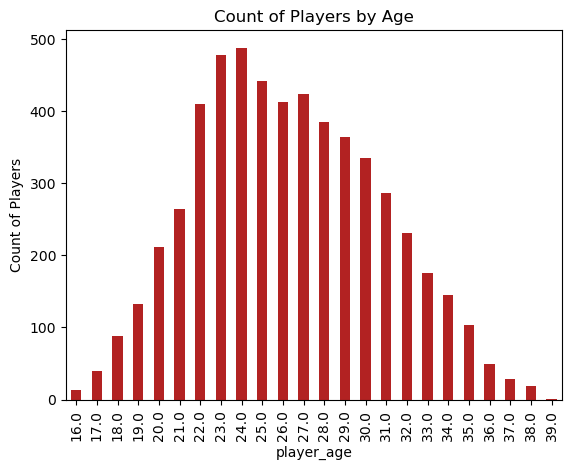

In [8]:
df.groupby("player_age").player_id.count().plot(kind="bar", ylabel="Count of Players", title="Count of Players by Age", color="firebrick")
plt.show()

Offensive Goals Added increases YoY, however, once players reach their 30s, survival bias kicks in. Only the best players continue to perform.
It is interesting that there is no obvious macro-decrease in performance as players age, it is a continual increase. For future work, it would be worth breaking down by position.

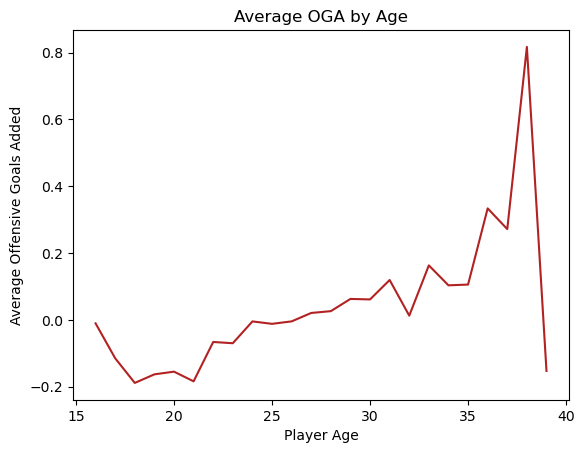

In [9]:
df.groupby("player_age").offensive_goals_added.mean().plot(ylabel="Average Offensive Goals Added", xlabel="Player Age", title="Average OGA by Age", color="firebrick")
plt.show()

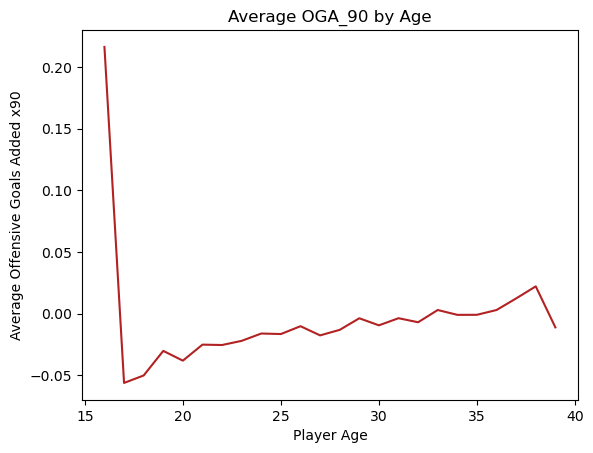

In [10]:
df.groupby("player_age").offensive_goals_added_90.mean().plot(ylabel="Average Offensive Goals Added x90", xlabel="Player Age", title="Average OGA_90 by Age", color="firebrick")
plt.show()

In [11]:
# 29 is the 75th Percentile. Decrease expected performance beyond that for the average player
def age_adjustment(age):
    if pd.isnull(age):
        return 1
    elif age <= 0:
        return 1
    elif age >= 29:
        return 1 / (1 + 0.003 * (age - 29))
    elif age < 29:
        return 1 + 0.006 * (29 - age)

In [12]:
# Unit Tests
print(age_adjustment(38))
print(age_adjustment(29))
print(age_adjustment(23))
print(age_adjustment(17)) # We expect a higher increase in expected performance until the age of 29

0.9737098344693282
1.0
1.036
1.072


## Marcel Projections

Marcel Projections are a basic forecasting system for counting stats. It typically uses 3 years of season data, with the most recent data weighted heavier. It regresses towards the mean. And it has an age factor. As a baseline, they are typically pretty good and are fairly reliable compared to more complicated systems.

I built a Marcel implementation for the MLS from Tom Tango's description and an open-source baseball focused library. I experimented with various regression to the mean and age adjustments specific to this data set.

In [13]:
# https://tangotiger.net/archives/stud0346.shtml
# Inspired from pybaseball's implementation

# inputs - dataset, next season, metric to projected, playing time for weighted averages, 500 minutes ~ 25th percentile
def calculateMarcel(df, projected_season, metric_name, playing_time_column, num_regression_pt=500):
    
    # load min/max years for projections (last 3 by default)
    min_year = max(df.season_name.min(), projected_season-3)
    max_year = max(df.season_name.min(), projected_season-1)
    
    print(f"Using data from: {min_year}-{max_year}")

    # get needed columns
    idx_cols = ['season_name', 'player_id', 'player_name', 'player_age'] # dataframe specific
    val_cols = [playing_time_column, metric_name]
    cols = idx_cols + val_cols

    # filter to data we need
    sub = df.loc[(df.season_name >= min_year) & (df.season_name <= max_year), cols]
    
    # calculate year weights (5,4,3) - I tried (5,3,1) but past years were important
    yr_weights = {}
    weight = 5
    for x in range(max_year, min_year-1, -1):            
        yr_weights[x] = weight
        weight -= 1

    # calculate average metric per playing time per season    
    seasonal_avg_df = sub.groupby("season_name").agg({metric_name: "sum", playing_time_column: "sum"}).assign(
                seasonal_avg=lambda row: row[metric_name] / row[playing_time_column]
            ).reset_index().loc[:, ["season_name", "seasonal_avg"]]
    
    # get players to project
    stats_df_season = sub.query(f"season_name == {max_year}").loc[:, ["player_id", "player_name"]]

    # get the metric data from each year in the min/max range
    metric_df = pd.concat(
                [
                    (
                        stats_df_season.merge(
                            sub.query(f"season_name == {prior_year_offset}"),
                            on=["player_id", "player_name"],
                            how="left", # in case player doesn't have data in all history
                            suffixes=["_x", ""],
                        )
                        .set_index(["player_id", "player_name"])
                        .loc[:, metric_name]
                    )
                    for prior_year_offset in list(yr_weights.keys()) # for each year in history
                ],
                axis=1,
            ).fillna(0) # this takes care of the "null" metrics or playing times in past years

    # playing time history
    pt_df = pd.concat(
                [
                    (
                        stats_df_season.merge(
                            sub.query(f"season_name == {prior_year_offset}"),
                            on=["player_id", "player_name"],
                            how="left", # in case player doesn't have data in all history
                            suffixes=["_x", ""],
                        )
                        .set_index(["player_id", "player_name"])
                        .loc[:, playing_time_column]
                    )
                    for prior_year_offset in list(yr_weights.keys()) # for each year in history
                ],
                axis=1,
            ).ffill(axis=1) #.fillna(0) 
    # ffill has a better playing time projection estimate. 0 negatively impacts players that didn't play in multiple history years

    # sort season averages descending to match weights
    sa_df = seasonal_avg_df.sort_values(by="season_name", ascending=False).loc[:, "seasonal_avg"]

    # init variables for calculations
    metric_values = metric_df.values
    pt_values = pt_df.values

    # weights for metric & playing time
    metric_weights = list(yr_weights.values())
    pt_weights = (0.5, 0.25, 0) # these weights perform better than the defaults of (0.5, 0.1, 0)
    seasonal_averages = sa_df.values
    pt_values[pt_values == 0] = sys.float_info.min # ensures no divide by 0 errors

    # get weighted metric values from history, unregressed
    normalized_metric_weights = np.array(metric_weights) / sum(metric_weights)
    unregressed_player_projection = np.sum(
        metric_values * normalized_metric_weights, 1
    )

    # league average constant per minute per year 
    mean_rate_projection = np.sum(
        seasonal_averages * pt_values * normalized_metric_weights, 1
    ) / np.sum(pt_values * normalized_metric_weights, 1)

    # regressed metric target
    projection_numerator = (
        unregressed_player_projection + num_regression_pt * mean_rate_projection
    )

    # regressed playing time
    projection_denominator = (
        np.sum(pt_values * normalized_metric_weights, 1) + num_regression_pt
    )

    # final projections
    rate_projection = projection_numerator / projection_denominator
    pt_projection = np.sum(pt_values * pt_weights, 1) + num_regression_pt

    # get age adjustment
    age_df = sub.query(f"season_name == {max_year}").loc[:, ["player_id", "player_name", "player_age"]]
    age_values = age_df.player_age + 1
    age_adjustment_value = age_values.apply(age_adjustment).values

    # rebaseline against assumed league average
    weighted_average = np.sum(metric_weights * seasonal_averages) / np.sum(metric_weights)
    weighted_value = np.sum((rate_projection + (abs(rate_projection) * (age_adjustment_value - 1))) * pt_projection) / np.sum(pt_projection)
    rebaseline_value = weighted_average / weighted_value

    # returned dataframe
    x_df = stats_df_season.assign(
                season_name=projected_season,
                player_age=age_values.values,
                rate_projection=rate_projection,
                pt_projection=pt_projection,
                age_adjustment_value=age_adjustment_value,
                rebaseline_value=rebaseline_value,
                weighted_average=weighted_average,
                weighted_value=weighted_value,
            )

    # target columns - allow for negative rate projections
    x_df[metric_name + "_proj"] = (x_df.rate_projection + (abs(x_df.rate_projection) * (x_df.age_adjustment_value - 1))) * x_df.pt_projection * x_df.rebaseline_value
    x_df[metric_name + "_90_proj"] = 90 * x_df[metric_name + "_proj"] / x_df.pt_projection

    return(x_df)

## Execute Marcel for 2022

In [14]:
projected_season = 2022
metric_column = 'offensive_goals_added'
x_df = calculateMarcel(df, projected_season, metric_column, playing_time_column="minutes_played")
print("Players:", len(x_df))
x_df.head()

Using data from: 2019-2021
Players: 666


,player_id,player_name,season_name,player_age,rate_projection,pt_projection,age_adjustment_value,rebaseline_value,weighted_average,weighted_value,offensive_goals_added_proj,offensive_goals_added_90_proj
14,0Oq630dXQ6,Kevin Cabral,2022,23.0,-0.000052,2136.50,1.036,0.99958,-0.000019,-0.000019,-0.107991,-0.004549
18,0Oq632k7Q6,Danny Leyva,2022,19.0,-0.000578,1011.50,1.060,0.99958,-0.000019,-0.000019,-0.549811,-0.048920
22,0Oq633dAQ6,Griffin Yow,2022,20.0,-0.000245,757.00,1.054,0.99958,-0.000019,-0.000019,-0.175430,-0.020857
26,0Oq63JA7Q6,Wyatt Omsberg,2022,27.0,-0.000168,973.75,1.012,0.99958,-0.000019,-0.000019,-0.161752,-0.014950
28,0Oq63P32Q6,Nkosi Burgess,2022,25.0,-0.000029,2006.75,1.024,0.99958,-0.000019,-0.000019,-0.056521,-0.002535


## Evaluate 2022 Projections

In [15]:
# projections/target
proj = x_df.loc[:, ["player_id", "player_name", "season_name","pt_projection", f"{metric_column}_proj", f"{metric_column}_90_proj"]].reset_index(drop=True)
target = df.loc[df.season_name == projected_season, ["player_id", "player_name", "season_name", "minutes_played", metric_column, f"{metric_column}_90"]]

eval_df = pd.merge(target, proj, how="inner", on=["player_id", "player_name", "season_name"])
eval_df.sort_values(by=f"{metric_column}_90_proj", ascending=False).head()

,player_id,player_name,season_name,minutes_played,offensive_goals_added,offensive_goals_added_90,pt_projection,offensive_goals_added_proj,offensive_goals_added_90_proj
229,Oa5wJkgM14,Carlos Vela,2022,2800,2.3598,0.075851,1345.00,2.390375,0.159951
325,eV5D9A9qKn,Sebastián Blanco,2022,2010,2.2023,0.098610,1538.00,2.224451,0.130169
459,vzqorrRk5a,Carles Gil,2022,3181,4.5026,0.127392,2009.00,2.226782,0.099756
69,4JMA9R42MK,Adam Buksa,2022,888,1.0754,0.108993,2236.00,2.261317,0.091019
174,KAqBrrVqbg,Darwin Quintero,2022,1938,1.7604,0.081752,1523.25,1.494456,0.088299


In [16]:
# Carlos Vela had a crazy 2019 season - Vela finished the 2019 season by claiming the MLS Most Valuable Player Award for his performances
# One glaring limitation is 2020 counting stats skew playing time - future work
df.loc[df.player_id == 'Oa5wJkgM14']

,season_name,player_id,player_name,player_age,height_in,weight_lb,nationality,base_salary,guaranteed_compensation,team_id,team_name,team_short_name,team_abbreviation,primary_position,games,minutes_played,share_team_touches,attempted_passes,completed_passes,passing_percentage,xcompleted_passes,xpassing_percentage,passes_completed_over_expected_p100,passes_completed_over_expected,total_distance_yds,total_vertical_distance_yds,avg_distance_yds,avg_vertical_distance_yds,count_actions_Dribbling,count_actions_Fouling,count_actions_Interrupting,count_actions_Passing,count_actions_Receiving,count_actions_Shooting,goals_added_above_avg_Dribbling,goals_added_above_avg_Fouling,goals_added_above_avg_Interrupting,goals_added_above_avg_Passing,goals_added_above_avg_Receiving,goals_added_above_avg_Shooting,offensive_goals_added,goals_added_above_avg_Dribbling_90,goals_added_above_avg_Fouling_90,goals_added_above_avg_Interrupting_90,goals_added_above_avg_Passing_90,goals_added_above_avg_Receiving_90,goals_added_above_avg_Shooting_90,offensive_goals_added_90
2449,2018,Oa5wJkgM14,Carlos Vela,29.0,70.0,170.0,Mexico,4500000.0,6292500.0,eVq3ya6MWO,Los Angeles FC,Los Angeles FC,LAFC,W,29,2718,0.093141,1252,952,0.760383,942.7227,0.752973,0.740958,9.2768,26177.0241,4804.1157,20.908166,3.837153,816,95,123,1261,1255,102,0.3300,0.7924,-0.1967,3.3743,0.4247,0.7243,5.6457,0.010927,0.026238,-0.006513,0.111732,0.014063,0.023983,0.186944
2450,2019,Oa5wJkgM14,Carlos Vela,30.0,70.0,170.0,Mexico,4500000.0,6300000.0,eVq3ya6MWO,Los Angeles FC,Los Angeles FC,LAFC,W,33,3185,0.084024,1277,855,0.669538,880.1110,0.689202,-1.966421,-25.1112,25711.2506,3620.5588,20.134104,2.835207,900,103,119,1302,1306,167,3.7680,1.3092,-0.1321,0.5032,3.1515,2.5885,11.3204,0.106474,0.036995,-0.003733,0.014219,0.089053,0.073144,0.319886
2451,2020,Oa5wJkgM14,Carlos Vela,31.0,70.0,170.0,Mexico,4500000.0,6300000.0,eVq3ya6MWO,Los Angeles FC,Los Angeles FC,LAFC,W,8,576,0.066537,253,170,0.671937,172.6903,0.682570,-1.062648,-2.6885,5358.0866,808.8352,21.178208,3.196977,164,16,23,254,259,26,-0.3412,0.3254,-0.1919,0.0615,0.3294,0.4051,0.7802,-0.053312,0.050844,-0.029984,0.009609,0.051469,0.063297,0.121906
2452,2021,Oa5wJkgM14,Carlos Vela,32.0,70.0,170.0,Mexico,4500000.0,6300000.0,eVq3ya6MWO,Los Angeles FC,Los Angeles FC,LAFC,W,20,1402,0.064935,575,420,0.730435,420.2750,0.730913,-0.047600,-0.2737,10996.6775,1840.5236,19.124657,3.200911,330,42,55,581,573,59,-0.7806,0.1297,-0.2329,1.3878,0.1172,0.6512,1.5053,-0.050110,0.008326,-0.014951,0.089088,0.007524,0.041803,0.096631
2453,2022,Oa5wJkgM14,Carlos Vela,33.0,70.0,170.0,Mexico,2400000.0,4050000.0,eVq3ya6MWO,Los Angeles FC,Los Angeles FC,LAFC,W,35,2800,0.075891,1247,900,0.721732,892.0245,0.715336,0.639591,7.9757,25328.4471,4767.5694,20.311505,3.823231,545,84,130,1247,1132,71,-1.1886,0.3428,-0.1186,2.4324,0.7116,0.0616,2.3598,-0.038205,0.011019,-0.003812,0.078184,0.022873,0.001980,0.075851


In [17]:
# Evaluate against only players that played more than 500 minutes in 2022
# Distributions look close, hard to project playing time
# minimum values for per 90 aren't as harsh as observed
eval_sub = eval_df.loc[eval_df.minutes_played > 500]
eval_sub.describe()

,season_name,minutes_played,offensive_goals_added,offensive_goals_added_90,pt_projection,offensive_goals_added_proj,offensive_goals_added_90_proj
count,395.0,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2022.0,1919.129114,-0.034839,-0.007932,1726.858861,0.000725,-0.001182
std,0.0,835.708563,1.120343,0.052604,565.560085,0.539900,0.027726
min,2022.0,507.000000,-3.951100,-0.175733,510.500000,-1.875517,-0.072648
25%,2022.0,1218.000000,-0.660351,-0.038786,1268.000000,-0.310565,-0.016684
50%,2022.0,1889.000000,-0.164600,-0.007332,1774.750000,-0.060819,-0.003864
75%,2022.0,2646.000000,0.418150,0.021265,2175.500000,0.204133,0.011481
max,2022.0,3736.000000,5.441400,0.154002,2846.000000,2.390375,0.159951


In [18]:
eval_sub.sort_values(by=f"{metric_column}_90", ascending=True).head()

,player_id,player_name,season_name,minutes_played,offensive_goals_added,offensive_goals_added_90,pt_projection,offensive_goals_added_proj,offensive_goals_added_90_proj
212,NWMWVA9NQl,Khiry Shelton,2022,1544,-3.014800,-0.175733,2262.00,-0.991880,-0.039465
300,aDQ00OGQEv,Jozy Altidore,2022,676,-1.266800,-0.168657,1150.00,0.437306,0.034224
160,KAqB9KxB5b,Tah Brian Anunga,2022,1025,-1.751794,-0.153816,1600.00,-1.053510,-0.059260
7,0Oq6lLZgM6,Maximiliano Urruti,2022,2484,-3.951100,-0.143156,1964.50,-1.243855,-0.056985
379,gpMOyGlqzy,Kevin Molino,2022,507,-0.803000,-0.142544,1244.75,0.440101,0.031821


# Evaluate projections

395

METRICS
The r2 is 0.24166398588747073.
The mean squared error is 0.00209311540256787.
The root mean squared error is 0.04575057816648736.
The mean absolute error is 0.034029280657801204.



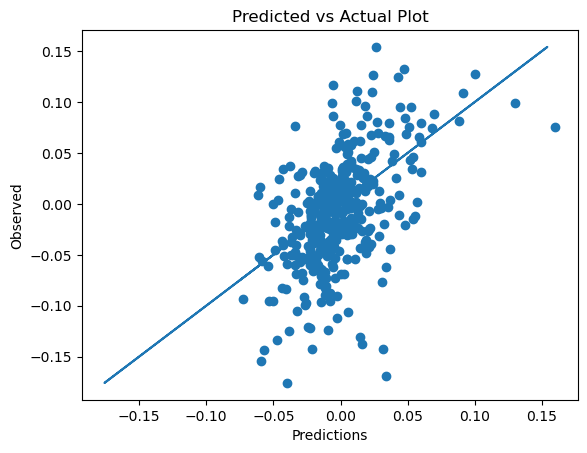

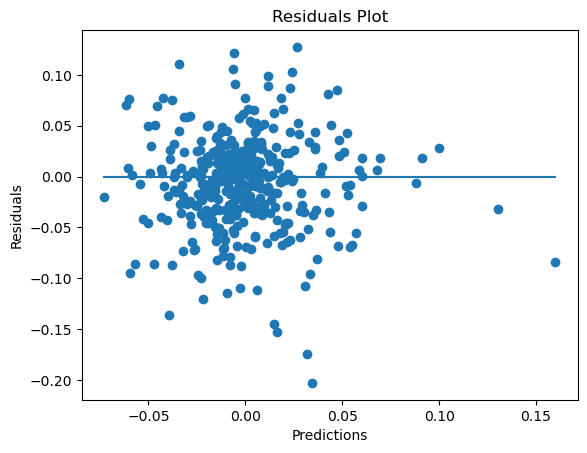

In [19]:
# Get eval metrics
print(len(eval_sub))

y_test = eval_sub.offensive_goals_added_90
test_preds = eval_sub.offensive_goals_added_90_proj

# get the metrics
resids = y_test - test_preds
r2 = r2_score(y_test, test_preds)
mse = mean_squared_error(y_test, test_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_preds)

# Print releveant metrics.
print()
print("METRICS")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The mean absolute error is {mae}.")
print()

# make a graph

# Predicted vs Actual Graph
plt.scatter(test_preds, y_test)
plt.xlabel("Predictions")
plt.ylabel("Observed")
plt.title("Predicted vs Actual Plot")
plt.plot(y_test, y_test)
plt.show()


# Residual Graph
plt.scatter(test_preds, resids)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.plot(test_preds, np.zeros(len(test_preds)))
plt.show()


METRICS
The r2 is -1.6712847534794406e-06.
The mean squared error is 0.002760147034832942.
The root mean squared error is 0.05253710150772445.
The mean absolute error is 0.039817778487300094.


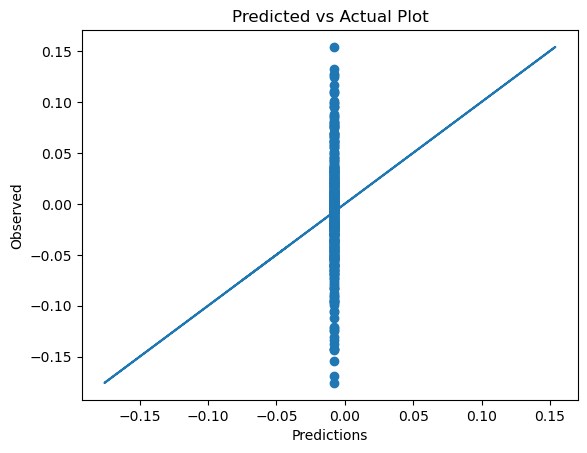

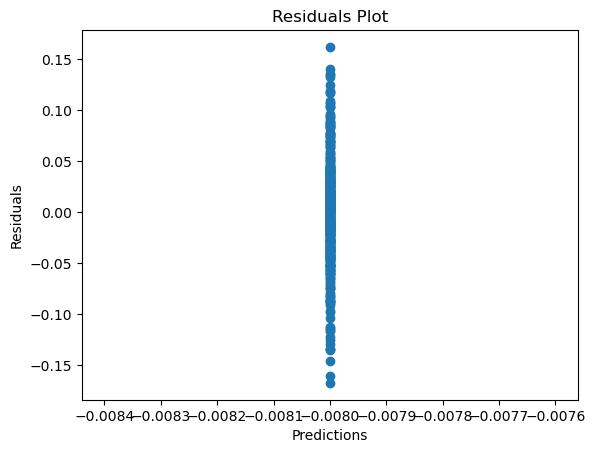

In [20]:
# compare to a constant average
y_test = eval_sub.offensive_goals_added_90
test_preds = np.repeat(-0.008, len(eval_sub))

# get the metrics
resids = y_test - test_preds
r2 = r2_score(y_test, test_preds)
mse = mean_squared_error(y_test, test_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_preds)

# Print releveant metrics.
print()
print("METRICS")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The mean absolute error is {mae}.")

# make a graph

# Predicted vs Actual Graph
plt.scatter(test_preds, y_test)
plt.xlabel("Predictions")
plt.ylabel("Observed")
plt.title("Predicted vs Actual Plot")
plt.plot(y_test, y_test)
plt.show()


# Residual Graph
plt.scatter(test_preds, resids)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.plot(test_preds, np.zeros(len(test_preds)))
plt.show()

MSE, RMSE, and MAE are all lower than just using a baseline average, so that's good

Limitations are around the poor performers as well as observed players with limited playing time (less than 500 minutes)

Overall, these are usable projections that are fairly intuitive and explainable, especially when highlighting stats from past years. 

# 2023 Projections

* Adam Buksa was transferred to Ligue 1 for $$$
* Carles Gil was an All-Star and scored 11 goals in 2023
* Hany Mukhtar was 2022 MVP and scored 15 goals in 2023
* José Cifuentes was transferred to Scotland Premier League

In [21]:
projected_season = 2023
metric_column = 'offensive_goals_added'
x_df = calculateMarcel(df, projected_season, metric_column, playing_time_column="minutes_played")
print("Players:", len(x_df))

# projections/target
proj = x_df.loc[:, ["player_id", "player_name", "season_name","pt_projection", f"{metric_column}_proj", f"{metric_column}_90_proj"]].reset_index(drop=True)

proj = proj.sort_values(by=f"offensive_goals_added_90_proj", ascending=False)
proj.head(15)

Using data from: 2020-2022
Players: 707


,player_id,player_name,season_name,pt_projection,offensive_goals_added_proj,offensive_goals_added_90_proj
93,4JMA9R42MK,Adam Buksa,2023,1548.00,2.537571,0.147533
659,vzqorrRk5a,Carles Gil,2023,2746.50,4.347702,0.142470
331,Oa5wVzeWM1,José Cifuentes,2023,2588.00,3.440887,0.119660
458,eV5D9A9qKn,Sebastián Blanco,2023,1886.50,2.413262,0.115130
244,KAqBrrVqbg,Darwin Quintero,2023,1753.25,2.222768,0.114102
333,Oa5wY8RXQ1,Hany Mukhtar,2023,2814.50,3.523257,0.112664
526,gpMOa0lnqz,Luiz Araújo,2023,2010.75,2.208434,0.098848
610,p6qbOeRXQ0,Jordan Morris,2023,1799.25,1.917323,0.095906
54,2lqRk3lnQr,Keaton Parks,2023,1821.25,1.882802,0.093042
208,EGMPVykqaY,Andreu Fontàs,2023,2700.75,2.713879,0.090438


In [22]:
proj.to_csv("output/mls_2023_projections_marcel.csv", index=False)